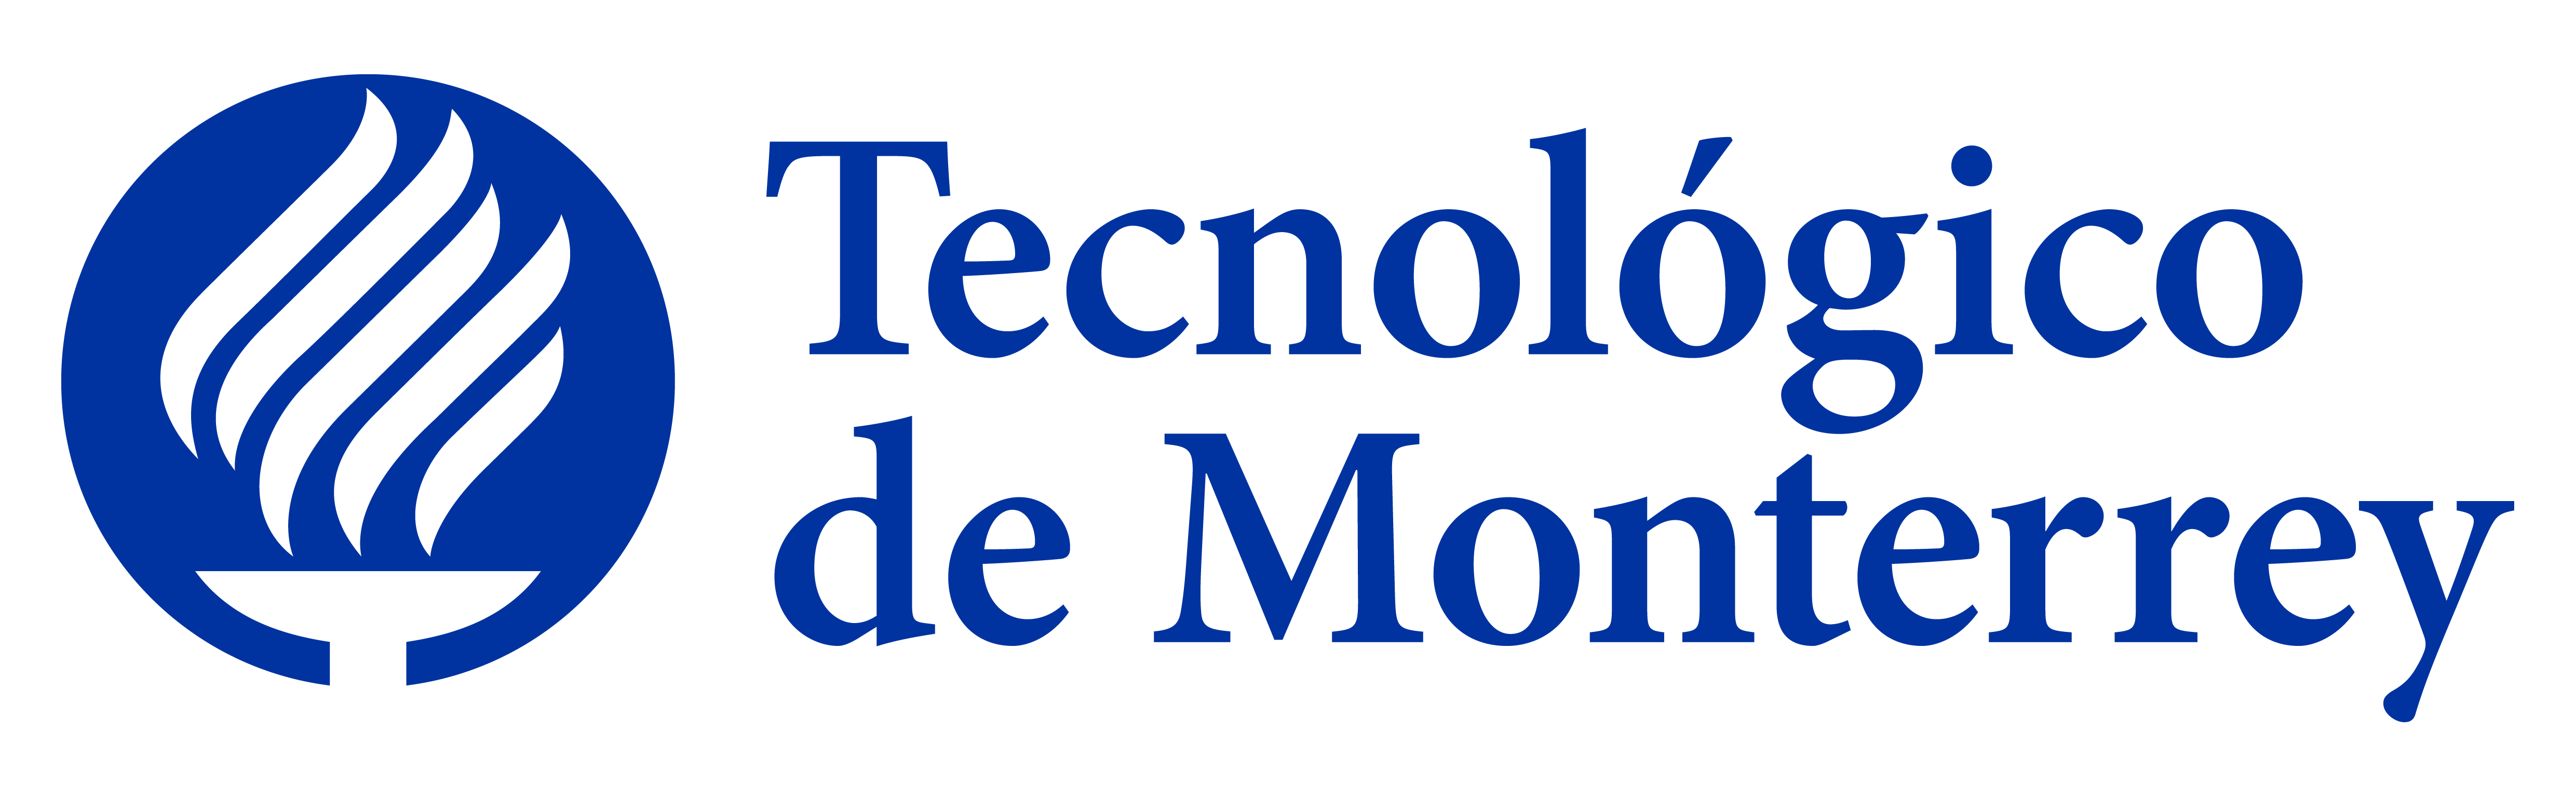

### **MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

#### **Curso: TC4029 - Ciencia y analítica de datos**


Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   **NÚMERO DE EQUIPO:**
*     Equipo #83

---        
        
*   **MIEMBROS DEL EQUIPO:**
*     Ernesto Damián Favela Vela: A00738581
*     Gustavo Alejandro Garduño Macedo: A01795341
*     Julia Gabriela Pinedo: A01795315
*     Juan Manuel Rodríguez Mateos: A01794890

--- 

In [1]:
# Importar Librerías

# import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Opciones adicionales de Pandas

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 50)
pd.set_option("display.max_colwidth", 500)

In [2]:
# Cargar el DataFrame

cars_df = pd.read_csv('vehicles.csv')
cars_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
# Obtener descripción de las columnas que forman parte del DataFrame

cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`.


In [4]:
# Guardar el nombre de las columnas en una lista

columns_to_remove = ['id', 'VIN', 'url', 'image_url', 'description', 'posting_date']

# Eliminar las columnas del DataFrame
cars_df.drop(columns=columns_to_remove, axis=1, inplace=True)

# Imprimir el DataFrame después de los cambios
cars_df

,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state,lat,long
0,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,wy,33.786500,-84.445400
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,wy,33.786500,-84.445400
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,wy,33.779214,-84.411811
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,wy,33.786500,-84.445400


1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores. 

In [5]:
# Obtener el número total de elementos y columnas
num_elements, num_columns = cars_df.shape

print('****************************************')
print(f'El número total de elementos es: {num_elements}')
print('****************************************')
print(f'El número total de columnas es: {num_columns}')
print('****************************************')

****************************************
El número total de elementos es: 426880
****************************************
El número total de columnas es: 20
****************************************


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [6]:
# Importar Librerías

from tabulate import tabulate

# Para determinar el porcentaje de valores faltantes, se utilizará una función que los
# imprimirá en una tabla

missing_percentage = cars_df.isna().sum() * 100 / len(cars_df)

# Guardar en un DataFrame para su impresión en una tabla

df_missing = pd.DataFrame({
    'Columna': cars_df.columns,
    'Porcentaje Faltantes': missing_percentage.astype(str) + '%' # Imprime el valor con el símbolo "%"
})

# Imprimir una tabla con los datos

print(tabulate(df_missing, headers='keys', tablefmt='psql', showindex=False))

+--------------+------------------------+
| Columna      | Porcentaje Faltantes   |
|--------------+------------------------|
| region       | 0.0%                   |
| region_url   | 0.0%                   |
| price        | 0.0%                   |
| year         | 0.28228073463268366%   |
| manufacturer | 4.133714392803598%     |
| model        | 1.2361787856071964%    |
| condition    | 40.78523238380809%     |
| cylinders    | 41.6224700149925%      |
| fuel         | 0.7058189655172413%    |
| odometer     | 1.0307346326836582%    |
| title_status | 1.9307533733133433%    |
| transmission | 0.5987631184407796%    |
| drive        | 30.586347451274364%    |
| size         | 71.7674756371814%      |
| type         | 21.752717391304348%    |
| paint_color  | 30.501077586206897%    |
| county       | 100.0%                 |
| state        | 0.0%                   |
| lat          | 1.5341547976011993%    |
| long         | 1.5341547976011993%    |
+--------------+------------------

In [7]:
# Se creará una función para retornar los labels de las columnas que tengan determinado porcentaje
# de valores faltantes en el DataFrame anteriormente creado con los porcentajes por columna.

# Importar Librerías

import re

# Declarar función

def filter_columns_by_percentage(df, column_keys, column_to_search, percentage, comparison='equal'):
    """
    Filtrar columnas por porcentaje de valores faltantes
    
    Args:
        df: DataFrame con los porcentajes de valores faltantes por columnas
        column_keys: Columna que contiene los labels de cada columna en el DataFrame
        column_to_search: Columna que contiene los porcentajes de valores faltantes de cada columna
        percentage: Porcentaje de valores faltantes a buscar
        comparison: Caso a analizar según lo indicado por el usuario
            equal = filtra porcentajes iguales al porcentaje de entrada
            greater_equal = filtra porcentajes mayores o iguales al porcentaje de entrada
            less_equal = filtra porcentajes menores o iguales al porcentaje de entrada
    
    Returns:
        filtered_columns: Una lista con los labels de las columnas que poseen el porcentaje deseado
    """  
    df[column_to_search] = df[column_to_search].str.extract(r'(\d+\.*\d*)').astype(float).copy()
    
    if comparison == 'equal':
        filtered_columns = df[df[column_to_search] == percentage]
    
    elif comparison == 'greater_equal':
        filtered_columns = df[(df[column_to_search] >= percentage)]
    
    elif comparison == 'less_equal':
        filtered_columns = df[(df[column_to_search] <= percentage) & (df[column_to_search] > 0.0)]
    
    return filtered_columns[column_keys].tolist()

In [8]:
# Se observa que las columnas que poseen el 30% o más de valores faltantes son las siguientes:

columns_more_than_30 = filter_columns_by_percentage(df=df_missing,
                                                    column_keys='Columna',
                                                    column_to_search='Porcentaje Faltantes',
                                                    percentage=30,
                                                    comparison='greater_equal')
print('Las columnas son:')
print(columns_more_than_30)

Las columnas son:
['condition', 'cylinders', 'drive', 'size', 'paint_color', 'county']


In [9]:
# Confirmando visualmente con los datos obtenidos anteriormente en la tabla.

# Por lo tanto, se utilizará la función anteriormente descrita para eliminar dichas columnas,
# aprovechando la variable definida "num_elements"

# Importar Librerías

import math

# Porcentaje de al menos el 70% de valores no-nulos
percentage_70 = math.floor(num_elements * 0.70) # Asegurar que el valor sea un entero

# Eliminar columnas que no contengan al menos el 70% de valores no-nulos
cars_df = cars_df.dropna(axis=1, thresh=percentage_70)
cars_df

,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long
0,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,33.786500,-84.445400
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,33.786500,-84.445400
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,33.779214,-84.411811
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,33.786500,-84.445400


In [10]:
# Se observa que después de eliminar dichas columas, se tiene un total de 14 columnas, a comparación
# de las 20 que se encontraban originalmente.

# Para obtener el valor de columnas eliminadas, se utilizará la variable "num_columns" definida
# anteriormente, y se creará la variable "num_columns_after_drop" para realizar la comparación.

num_columns_after_drop = cars_df.shape[1]

# Ahora, se obtendrá la cantidad de registros eliminados

columns_eliminated = num_columns-num_columns_after_drop

print(f'La cantidad de columnas eliminadas es: {columns_eliminated}')

La cantidad de columnas eliminadas es: 6


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30% 
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [11]:
# Para determinar el porcentaje de valores faltantes después de haber eliminado las columnas
# anteriores, se utilizará una función que los imprimirá en una tabla

missing_percentage_changed = cars_df.isna().sum() * 100 / len(cars_df)

# Guardar en un DataFrame para su impresión en una tabla

df_missing_changed = pd.DataFrame({
    'Columna': cars_df.columns,
    'Porcentaje Faltantes': missing_percentage_changed.astype(str) + '%'
    # Imprime el valor con el símbolo "%"
})

# Imprimir una tabla con los datos

print(tabulate(df_missing_changed, headers='keys', tablefmt='psql', showindex=False))

+--------------+------------------------+
| Columna      | Porcentaje Faltantes   |
|--------------+------------------------|
| region       | 0.0%                   |
| region_url   | 0.0%                   |
| price        | 0.0%                   |
| year         | 0.28228073463268366%   |
| manufacturer | 4.133714392803598%     |
| model        | 1.2361787856071964%    |
| fuel         | 0.7058189655172413%    |
| odometer     | 1.0307346326836582%    |
| title_status | 1.9307533733133433%    |
| transmission | 0.5987631184407796%    |
| type         | 21.752717391304348%    |
| state        | 0.0%                   |
| lat          | 1.5341547976011993%    |
| long         | 1.5341547976011993%    |
+--------------+------------------------+


In [12]:
# Se utilizará la función anteriormente declarada para guardar los labels de cada columna con menos del
# 5% de valores faltantes

columns_less_than_5 = filter_columns_by_percentage(df=df_missing_changed,
                                                   column_keys='Columna',
                                                   column_to_search='Porcentaje Faltantes',
                                                   percentage=5,
                                                   comparison='less_equal')
print('Las columnas son:')
print(columns_less_than_5)

Las columnas son:
['year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission', 'lat', 'long']


In [13]:
# Ahora, teniendo los labels de las columnas que cumplen dicha condición, se eliminarán los registros
# que contienen NaN mediante el parámetro subset.

cars_df = cars_df.dropna(subset=columns_less_than_5)
cars_df

,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long
27,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,32.590000,-85.480000
28,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,32.590000,-85.480000
29,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,32.590000,-85.480000
30,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,32.590000,-85.480000
31,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,32.592000,-85.518900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,33.786500,-84.445400
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,33.786500,-84.445400
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,33.779214,-84.411811
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,33.786500,-84.445400


In [14]:
# Se reinicia el index del DataFrame para mantener la continuidad entre las columnas

cars_df = cars_df.reset_index(drop=True)
cars_df

,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long
0,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,32.590000,-85.480000
1,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,32.590000,-85.480000
2,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,32.590000,-85.480000
3,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,32.590000,-85.480000
4,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,32.592000,-85.518900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383484,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,33.786500,-84.445400
383485,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,33.786500,-84.445400
383486,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,33.779214,-84.411811
383487,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,33.786500,-84.445400


In [15]:
# Se observa que después de eliminar dichos registros, se tiene un total de 383489 filas, a comparación
# de las 426880 que se encontraban originalmente.

# Para obtener el porcentaje, se utilizará la variable "num_elements" definida anteriormente, y
# se creará la variable "num_elements_after_drop" para realizar la comparación.

num_elements_after_drop = cars_df.shape[0]

# Se creará una variable para almacenar la cantidad de registros eliminados
eliminated_elements = num_elements-num_elements_after_drop

# Ahora, se obtendrá el porcentaje de registros eliminados
percentage_eliminated = ((eliminated_elements)/ num_elements) * 100

print(f'La cantidad de registros totales después de la eliminación es: {num_elements_after_drop}')
print(f'La cantidad de registros eliminados es: {num_elements_after_drop}')
print(f'El porcentaje de registros iniciales eliminados es: {percentage_eliminated}%')

La cantidad de registros totales después de la eliminación es: 383489
La cantidad de registros eliminados es: 383489
El porcentaje de registros iniciales eliminados es: 10.16468328335832%


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`) 

In [16]:
# Para determinar las variables que aún poseen valores faltantes, se utilizará una función que los
# imprimirá en una tabla

missing_percentage_after_drop = cars_df.isna().sum() * 100 / len(cars_df)

# Guardar en un DataFrame para su impresión en una tabla

df_missing_after_drop = pd.DataFrame({
    'Columna': cars_df.columns,
    'Porcentaje Faltantes': missing_percentage_after_drop.astype(str) + '%' 
    # Imprime el valor con el símbolo "%"
})

# Imprimir una tabla con los datos
print(tabulate(df_missing_after_drop, headers='keys', tablefmt='psql', showindex=False))

+--------------+------------------------+
| Columna      | Porcentaje Faltantes   |
|--------------+------------------------|
| region       | 0.0%                   |
| region_url   | 0.0%                   |
| price        | 0.0%                   |
| year         | 0.0%                   |
| manufacturer | 0.0%                   |
| model        | 0.0%                   |
| fuel         | 0.0%                   |
| odometer     | 0.0%                   |
| title_status | 0.0%                   |
| transmission | 0.0%                   |
| type         | 21.485622794917195%    |
| state        | 0.0%                   |
| lat          | 0.0%                   |
| long         | 0.0%                   |
+--------------+------------------------+


In [17]:
# Se observa que la variable "type" aún posee valores faltantes, por lo que se procederá
# a hacer un análisis de dicha variable.

#### Analizando la variable `type`

In [18]:
column_dtype = cars_df["type"].dtype

print(f"La columna \"type\" es del tipo: {column_dtype}")

La columna "type" es del tipo: object


- La variable es de tipo objeto, por lo tanto, solo métodos para variables categóricas hacen sentido.

In [19]:
# El mejor método de imputación es la moda, pues se utiliza para trabajar con datos categóricos 
# o nominales. La moda representa la categoría que ocurre con más frecuencia y es adecuada para 
# imputar valores faltantes en dichos datos.

# Se imprimirá un gráfico de barras para observar su comportamiento.

<AxesSubplot:xlabel='type'>

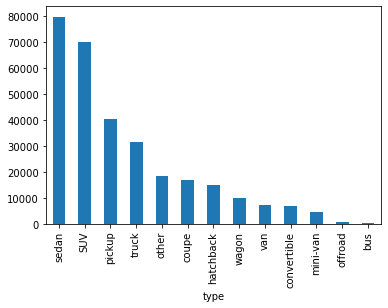

In [20]:
cars_df.value_counts("type").sort_values(ascending=False).plot(kind="bar")

- Se observa que la categoría que tiene más frecuencia (moda) es el tipo de auto sedán. Por lo tanto, se puede hacer una imputación de valores faltantes por moda de la categoría.

- Otra alternativa sería hacer un modelo de regresión multinomial usando como variable de salida `type` e imputar la predicción de la categoría (un método más robusto), sin embargo, esto no es práctico sin antes observar la precisión del modelo usando la estrategia básica, que es imputación de moda.

In [21]:
# Antes de realizar la imputación de moda, se obtendrá una descripción estadística de la
# variable "type"

type_description = cars_df['type'].describe()
print('Descripción estadística de la columna type sin procesar:')
print(tabulate(type_description.to_frame(), headers=['type'],
               tablefmt="psql", showindex=True))

Descripción estadística de la columna type sin procesar:
+--------+--------+
|        | type   |
|--------+--------|
| count  | 301094 |
| unique | 13     |
| top    | sedan  |
| freq   | 79618  |
+--------+--------+


- Imputación de moda:

In [22]:
cars_df["type"] = cars_df["type"].fillna(value = cars_df["type"].mode()[0])

In [23]:
# Observar la descripción estadística de dicha columna después de aplicar la moda

type_description_input = cars_df['type'].describe()
print('Descripción estadística de la columna type procesada:')
print(tabulate(type_description_input.to_frame(), headers=['type'],
               tablefmt="psql", showindex=True))

Descripción estadística de la columna type procesada:
+--------+--------+
|        | type   |
|--------+--------|
| count  | 383489 |
| unique | 13     |
| top    | sedan  |
| freq   | 162013 |
+--------+--------+


Corroboramos que el DataFrame no tiene valores faltantes:

In [24]:
cars_df.isna().mean().to_frame("Porcentaje Faltantes")

,Porcentaje Faltantes
region,0.0
region_url,0.0
price,0.0
year,0.0
manufacturer,0.0
model,0.0
fuel,0.0
odometer,0.0
title_status,0.0
transmission,0.0


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución. 

- Histograma variable `price`

<AxesSubplot:ylabel='Frequency'>

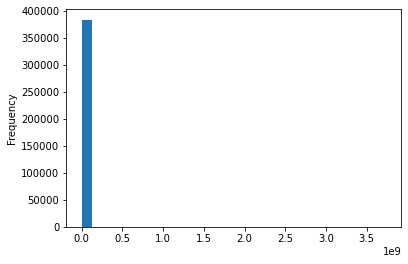

In [25]:
cars_df["price"].plot(kind = "hist", bins = 30)

- Histograma variable `year`

<AxesSubplot:ylabel='Frequency'>

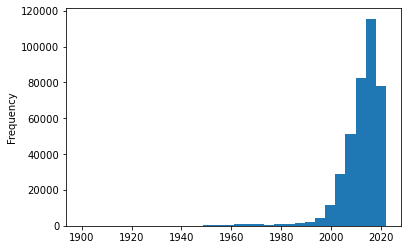

In [26]:
cars_df["year"].plot(kind = "hist", bins = 30)

- Histograma variable `odometer`

<AxesSubplot:ylabel='Frequency'>

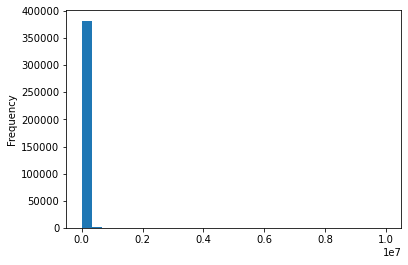

In [27]:
cars_df["odometer"].plot(kind = "hist", bins = 30)

#### Analizando la variable `price`

In [28]:
cars_df["price"].to_frame().describe()

,price
count,3.834890e+05
mean,6.478803e+04
std,1.153956e+07
min,0.000000e+00
25%,5.999000e+03
50%,1.399800e+04
75%,2.688800e+04
max,3.736929e+09


- Se observa un histograma extremadamente sesgado a la izquierda con valores atípicos que hacen que la cola de la distribución sea pesada. Esto confirmado por el hecho de que la media (64,788) es mucho más grande que la mediana (13,998).
- Dicha media es "inflada" porque hay valores del precio atípicos, por ejemplo, un máximo en el precio de 3,736,929,000. Lo cual es posiblemente un error en los datos, dado que un precio tan elevado no tiene sentido en el contexto de negocio.

#### Analizando la variable `year`

In [29]:
# Observar la descripción estadística de la columna "year"

year_description = cars_df['year'].describe()
print('Descripción estadística de la variable "year":')
print(tabulate(year_description.to_frame(), headers=['year'],
               tablefmt="psql", showindex=True))

Descripción estadística de la variable "year":
+-------+--------------+
|       |         year |
|-------+--------------|
| count | 383489       |
| mean  |   2011.57    |
| std   |      8.68262 |
| min   |   1900       |
| 25%   |   2008       |
| 50%   |   2014       |
| 75%   |   2017       |
| max   |   2022       |
+-------+--------------+


In [30]:
# ******************************** CONCLUSIÓN: Variable "year" ***********************************

# Al igual que en la variable "price", la curva se observa con una "cola" más larga hacia la
# izquierda, dato que se puede corroborar visualmente y con los valores impresos de la Media,
# Mediana y Moda, pues se indica que:  moda > mediana > media, lo que confirma que dicha variable
# mantiene un sesgo hacia la izquierda. Esta variable puede ser considerada como CUANTITATIVA,
# debido a que es un valor numérico. Típicamente, los años se cuentan en enteros y no en fracciones
# o números decimales, por lo que de igual forma podría ser considerada como DISCRETA.

# Para concluir las afirmaciones anteriormente expuestas, se imprimirá el valor numérico de la 
# asimetría para la variable "year".

skewness_year = cars_df['year'].skew()

print(f'La asimetría de la variable "year" es: {skewness_year}')

La asimetría de la variable "year" es: -3.470448814609016


#### Analizando la variable `odometer`

In [31]:
# Observar la descripción estadística de la columna "odometer"

odometer_description = cars_df['odometer'].describe()
print('Descripción estadística de la variable "odometer":')
print(tabulate(odometer_description.to_frame(), headers=['odometer'],
               tablefmt="psql", showindex=True))

Descripción estadística de la variable "odometer":
+-------+------------+
|       |   odometer |
|-------+------------|
| count | 383489     |
| mean  |  96623.1   |
| std   | 192781     |
| min   |      0     |
| 25%   |  38000     |
| 50%   |  85986     |
| 75%   | 134000     |
| max   |      1e+07 |
+-------+------------+


In [32]:
# ****************************** CONCLUSIÓN: Variable "odometer" *********************************

# En esta variable, se puede observar un sesgo positivo, debido a que la moda < mediana < media
# como se aprecia en el histograma. Además, al tomar en cuenta la información de la descripción
# estadística, se confirma el comportamiento de dicha variable, pues la mediana tiene un valor
# de 85,986 mientras que la media de 96,623.1. El valor máximo es mucho mayor al promedio, por
# lo que dicha variable seguramente tendrá diversos outliers. Esta variable se puede clasificar
# como CUANTITATIVA CONTINUA, debido a la naturaleza de los odómetros.

# Las lecturas de un odómetro pueden adoptar una amplia gama de valores (números reales) e 
# incluir fracciones decimales. Estas lecturas pueden variar continuamente debido a que 
# muestran la distancia exacta que ha recorrido un vehículo en fracciones de milla o kilómetro.
# En este DataFrame, las lecturas son expresadas en millas.

# Para concluir las afirmaciones anteriormente expuestas, se imprimirá el valor numérico de la 
# asimetría para la variable "odometer".

skewness_odometer = cars_df['odometer'].skew()

print(f'La asimetría de la variable "odometer" es: {skewness_odometer}')

La asimetría de la variable "odometer" es: 41.4143766606019


3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable. 

In [33]:
# Importar Librerías

from datetime import date

cars_df["age"] = date.today().year - cars_df["year"]
cars_df.drop(columns=["year"], axis=1, inplace=True)
cars_df.head() # Imprimir las 5 primeras filas del DataFrame

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long,age
0,auburn,https://auburn.craigslist.org,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,32.590,-85.4800,9.0
1,auburn,https://auburn.craigslist.org,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,32.590,-85.4800,13.0
2,auburn,https://auburn.craigslist.org,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,32.590,-85.4800,3.0
3,auburn,https://auburn.craigslist.org,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,32.590,-85.4800,6.0
4,auburn,https://auburn.craigslist.org,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,32.592,-85.5189,10.0


In [34]:
# Corroborar que al eliminar la columna, quedaron 14 columnas en total, pues se eliminó
# year (13) pero se agregó "age" (14).

cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383489 entries, 0 to 383488
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        383489 non-null  object 
 1   region_url    383489 non-null  object 
 2   price         383489 non-null  int64  
 3   manufacturer  383489 non-null  object 
 4   model         383489 non-null  object 
 5   fuel          383489 non-null  object 
 6   odometer      383489 non-null  float64
 7   title_status  383489 non-null  object 
 8   transmission  383489 non-null  object 
 9   type          383489 non-null  object 
 10  state         383489 non-null  object 
 11  lat           383489 non-null  float64
 12  long          383489 non-null  float64
 13  age           383489 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 41.0+ MB


<AxesSubplot:ylabel='Frequency'>

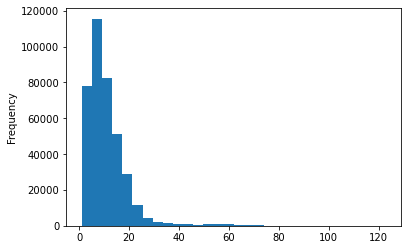

In [35]:
cars_df["age"].plot(kind = "hist", bins = 30)

In [36]:
# Se observa que la variable 'age' tiene un sesgo hacia la derecha, debido a que los
# valores graficados para la Media, Mediana y Moda, tienen el siguiente comportamiento:
# moda < mediana < media, lo que indicaría una asimetría positiva. La variable "age"
# es el tipo CUANTITATIVA, y al igual que la variable eliminada ("year"), es del tipo
# DISCRETO, pues no se utilizan valores medios, y es la diferencia del año actual
# (2023) menos el año de manufactura del vehículo.

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

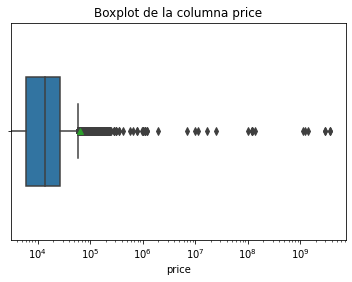

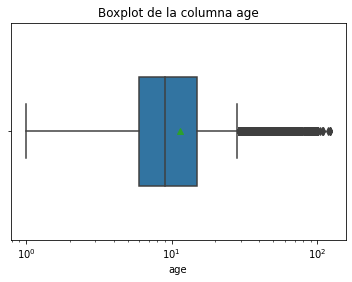

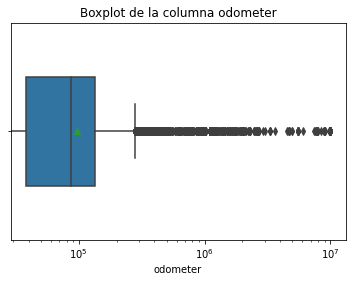

In [37]:
columns_to_analyze = ["price","age","odometer"]

for col in columns_to_analyze:
  sns.boxplot(x=cars_df[col], width=0.5, showmeans=True)
  plt.xscale("log")
  plt.title(f"Boxplot de la columna {col}")
  plt.show()

- Existen valores atípicos para las 3 variables. Incluso, se utilizó una transformación logaritmica base 10 en cada una de las variables dada la magnitud de los valores atípicos. Como se observó en los estadísticos descriptivos de `price`.

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [38]:
def IQR(x):
    """
    Calcular el IQR de una serie de datos numéricos determinada
    
    Args:
        x (serie Pandas): la serie de datos para la que se calcula el IQR
    
    Returns:
        float: el IQR de la serie de datos
    """
    return x.quantile(0.75) - x.quantile(0.25)

def get_outliers(df, col_name):
    """
    Identificar valores atípicos en una columna de un DataFrame
    
    Args:
        df (DataFrame)
        col_name (str)
    
    Returns:
        outliers (list): una lista de valores atípicos en la columna especificada
    """
    iqr = IQR(x = df[col_name])

    outlier_upper_limit = df[col_name].quantile(0.75) + 1.5 * iqr

    outlier_lower_limit = df[col_name].quantile(0.25) - 1.5 * iqr

    outliers = df.\
      query(f'{col_name} > @outlier_upper_limit or {col_name} < @outlier_lower_limit')[col_name].\
      to_list()

    print(f"Cantidad de outliers para la columna {col_name}: {len(outliers)}")
    print(f"Porcentaje de outliers para la columna {col_name}: {round(len(outliers)/len(df[col_name]) * 100, 4)} %")
    print("------------------------")

    return outliers

In [39]:
print("------------------------")
price_outliers = get_outliers(cars_df,"price")
age_outliers = get_outliers(cars_df,"age")
odometer_outliers = get_outliers(cars_df,"odometer")

------------------------
Cantidad de outliers para la columna price: 6285
Porcentaje de outliers para la columna price: 1.6389 %
------------------------
Cantidad de outliers para la columna age: 12023
Porcentaje de outliers para la columna age: 3.1352 %
------------------------
Cantidad de outliers para la columna odometer: 3118
Porcentaje de outliers para la columna odometer: 0.8131 %
------------------------


In [40]:
# ************************ CONCLUSIÓN: Sobre los porcentajes obtenidos ***************************

# Se observa que en las tres variables a analizar, se obtuvieron porcentajes menores al 5%,
# cantidad señalada en el punto anterior. Este porcentaje se debe tomar en consideración debido a
# los siguientes puntos:

# 1) Existen diferentes estrategias para llevar a cabo el tratamiento de valores atípicos, por lo
# cual se debe definir el mejor método para garantizar que no influyan indemidamente en el análisis
# estadístico de éstos.
# 2) La eliminación de valores atípicos puede afectar la distribución, las estadísticas y las
# relaciones dentro de los datos.
# 3) El tamaño de los datos es un factor a considerar para analizar el impacto que puede llegar a
# tener la eliminación de estos valores.

# En resumen, dados los porcentajes anteriormente obtenidos, se identifica que los valores atípicos
# en el DataFrame NO son problemáticos, debido a que éstos representan un porcentaje menor al 5%, el
# cual es un valor relativamente pequeño comparado con la magnitud total del DataFrame, que aún 
# después de eliminar las filas que contenían valores faltantes mantuvo un total de 383,489 registros
# (variable "num_elements_after_drop"), una cantidad bastante grande. En el análisis de las variables,
# se observó que varios de los valores atípicos son anomalías claras; por lo cual, tomando en cuenta
# dicha información, la estrategia que se seguirá será el MÉTODO DE DESCARTE para eliminar los valores
# atípicos del DataFrame.

In [41]:
def remove_outliers(df, cols):
    """
    Eliminar valores atípicos de columnas específicas de un DataFrame
           
    Args:
        df (DataFrame)
        col_name (str)
    
    Returns:
        df_without_outliers (DataFrame): DataFrame con los valores atípicos eliminados
    """
    df_without_outliers = df
    
    for idx, col in enumerate(cols):
        
        df_without_outliers = df_without_outliers.query(f"{col} not in @{col}_outliers")
    
    return df_without_outliers

In [42]:
# "columns_to_analyze" declarada anteriormente

cars_df_without_outliers = remove_outliers(cars_df, columns_to_analyze)
cars_df_without_outliers

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long,age
0,auburn,https://auburn.craigslist.org,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,32.590000,-85.480000,9.0
1,auburn,https://auburn.craigslist.org,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,32.590000,-85.480000,13.0
2,auburn,https://auburn.craigslist.org,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,32.590000,-85.480000,3.0
3,auburn,https://auburn.craigslist.org,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,32.590000,-85.480000,6.0
4,auburn,https://auburn.craigslist.org,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,32.592000,-85.518900,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383484,wyoming,https://wyoming.craigslist.org,23590,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,33.786500,-84.445400,4.0
383485,wyoming,https://wyoming.craigslist.org,30590,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,33.786500,-84.445400,3.0
383486,wyoming,https://wyoming.craigslist.org,34990,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,33.779214,-84.411811,3.0
383487,wyoming,https://wyoming.craigslist.org,28990,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,33.786500,-84.445400,5.0


In [43]:
# Se reinicia el índice para asegurar continuidad entre las filas

cars_df_without_outliers = cars_df_without_outliers.reset_index(drop=True)
cars_df_without_outliers

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long,age
0,auburn,https://auburn.craigslist.org,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,32.590000,-85.480000,9.0
1,auburn,https://auburn.craigslist.org,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,32.590000,-85.480000,13.0
2,auburn,https://auburn.craigslist.org,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,32.590000,-85.480000,3.0
3,auburn,https://auburn.craigslist.org,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,32.590000,-85.480000,6.0
4,auburn,https://auburn.craigslist.org,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,32.592000,-85.518900,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362758,wyoming,https://wyoming.craigslist.org,23590,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,33.786500,-84.445400,4.0
362759,wyoming,https://wyoming.craigslist.org,30590,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,33.786500,-84.445400,3.0
362760,wyoming,https://wyoming.craigslist.org,34990,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,33.779214,-84.411811,3.0
362761,wyoming,https://wyoming.craigslist.org,28990,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,33.786500,-84.445400,5.0


In [44]:
# Se observa una disminución en las filas, pues ahora son 362,763 registros con los que cuenta el
# DataFrame. Se almacenará en una variable para su posterior análisis.

rows_without_outliers = cars_df_without_outliers.shape[0]

print(f"La cantidad de filas sin outliers es: {rows_without_outliers}")

La cantidad de filas sin outliers es: 362763


In [45]:
"""Análisis de registros iniciales (sección 1) vs. registros actuales"""

# num_elements: variable que contiene el número total de observaciones original

rows_removed_vs_original = num_elements - rows_without_outliers
percentage_removed_vs_original = round(((rows_removed_vs_original)/ num_elements) * 100,4)

print(f"La cantidad de filas eliminadas con respecto a los "
      f"registros originales es: {rows_removed_vs_original}")
print(f"El porcentaje de filas eliminadas con respecto a los "
      f"registros originales es: {percentage_removed_vs_original}%")

La cantidad de filas eliminadas con respecto a los registros originales es: 64117
El porcentaje de filas eliminadas con respecto a los registros originales es: 15.0199%


- **Adicional:** Cantidad de filas eliminadas con respecto al DataFrame obtenido después de eliminar los registros que contenían `NaN` mediante el parámetro "subset". (Para analizar la cantidad de observaciones borradas después de limpiar el DataFrame con respecto a los valores atípicos).

In [46]:
# num_elements_after_drop: variable que contiene el número de observaciones después de borrar
# los registros con valores faltantes

rows_removed_vs_dropna = num_elements_after_drop - rows_without_outliers
percentage_removed_vs_dropna = round(((rows_removed_vs_dropna)/ num_elements_after_drop) * 100,4)

print(f"La cantidad de filas eliminadas con respecto a los "
      f"registros sin valores faltantes es: {rows_removed_vs_dropna}")
print(f"El porcentaje de filas eliminadas con respecto a los "
      f"registros sin valores faltantes es: {percentage_removed_vs_dropna}%")

La cantidad de filas eliminadas con respecto a los registros sin valores faltantes es: 20726
El porcentaje de filas eliminadas con respecto a los registros sin valores faltantes es: 5.4046%


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers. 

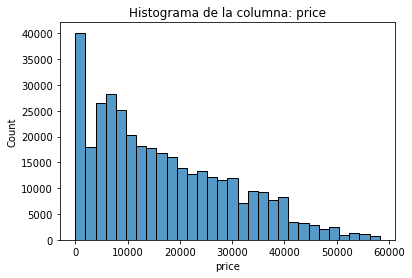

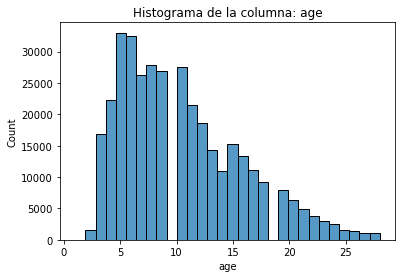

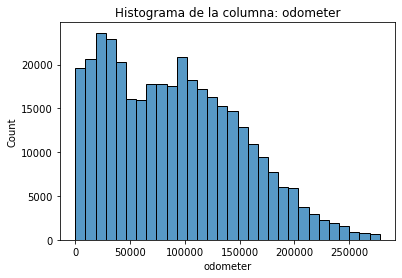

In [47]:
cols = ['price','age','odometer']

for col in cols:
    sns.histplot(cars_df_without_outliers, x = col, bins = 30)
    plt.title(f"Histograma de la columna: {col}")
    plt.show()

In [48]:
# Al observar las tres gráficas, se podría decir que todas contienen un sesgo. Claramente, el 
# grado de dispersión de dichos datos causa que las "colas" de las curvas sean dispersas entre
# los valores altos de la variable; por lo tanto, se podría decir que el tipo de sesgo sería
# con asimetría positiva. Sin embargo, para validar dichas afirmaciones podemos valernos del
# cálculo numérico de las mismas, pues se puede identificar una distribución casi simétrica.

skewness_price_clean = cars_df_without_outliers['price'].skew()
skewness_age_clean = cars_df_without_outliers['age'].skew()
skewness_odometer_clean = cars_df_without_outliers['odometer'].skew()

print('*************************************************************')
print(f'La asimetría de la variable "price" es: {skewness_price_clean}')
print('*************************************************************')
print(f'La asimetría de la variable "age" es: {skewness_age_clean}')
print('*************************************************************')
print(f'La asimetría de la variable "odometer" es: {skewness_odometer_clean}')
print('*************************************************************')

*************************************************************
La asimetría de la variable "price" es: 0.6966417762150817
*************************************************************
La asimetría de la variable "age" es: 0.8086590201626288
*************************************************************
La asimetría de la variable "odometer" es: 0.4635395926706512
*************************************************************


# **Parte 2**. Ingeniería de características

## Transformando variables numéricas 

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


In [49]:
# Para obtener los gráficos Q-Q de cada una de las variables, se llevará a cabo una
# función.

# Importar Librerías

from scipy import stats

def create_QQ_graph_for_each_column(df, column_name):
    """
    Generar un gráfico Q-Q para cada columna
    
    Args:
        df (DataFrame)
        col_name (str)
        
    Returns:
        gráfico Q-Q (graph): gráfica cuantil-cuantil
    """
    plt.figure(figsize=(10, 7)) # Definir tamaño de la figura
    stats.probplot(df[column_name], plot=plt, dist='norm') # Generar gráfico Q-Q
    plt.title(f'Gráfico Q-Q para la columna {column_name}')
    plt.show()

*************************************************************************************




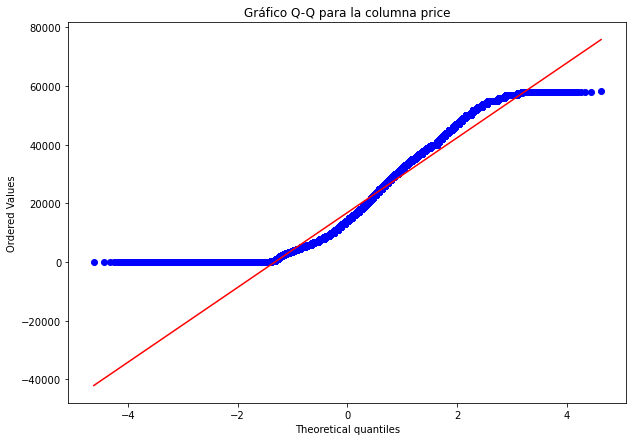



*************************************************************************************




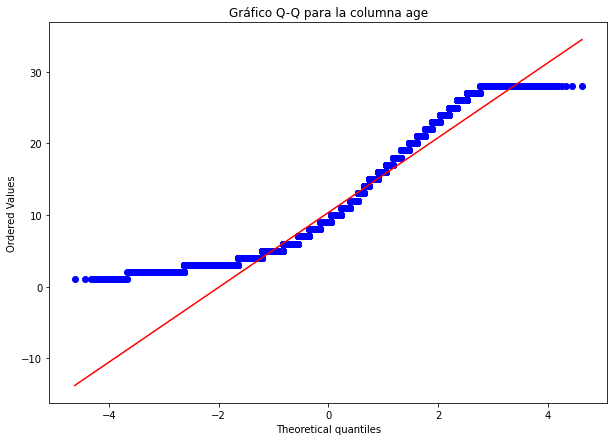



*************************************************************************************




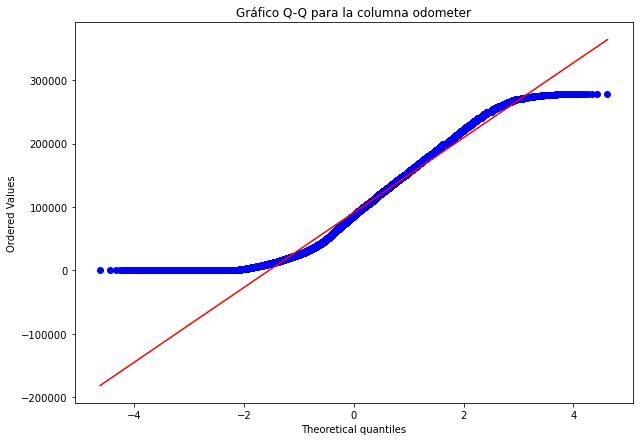

In [50]:
# Imprimir gráficas

columns_for_QQ = ['price', 'age', 'odometer'] 

# Ciclo for para obtener los gráficos por columnas

for column_name in columns_for_QQ:
    print('*************************************************************************************')
    print('\n')
    create_QQ_graph_for_each_column(df=cars_df_without_outliers,
                                    column_name=column_name)
    print('\n')

In [51]:
# ************************** CONCLUSIÓN: Sobre los gráficos obtenidos ****************************

# Se observa en los tres gráficos que la distribución efectivamente tiene un sesgo. Los valores 
# obtenidos de asimetría se encuentran bastante cercanos al 0, por lo que podría decirse que la
# distribución es casi simétrica, sin embargo, por la naturaleza de la curva, es posible apreciar
# el sesgo que se afirmó al imprimir los histogramas correspondientes. Otro punto a analizar es que
# el peso de la cola se observa del tipo "colas cortas", por lo que los gráficos de Boxplot 
# podrían apreciar dicho comportamiento

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [52]:
# Importar Librerías

from scipy.stats import yeojohnson

# Guardar las columnas a las que se le hará la transformación en una lista
# columns_for_QQ: anteriormente definido

# Se crea una copia del DataFrame 'clean' (sin valores faltantes y outliers) en
# "transf_df"
transf_df = cars_df_without_outliers.copy()

for column in columns_for_QQ:
    transf_df[column], _ = yeojohnson(cars_df_without_outliers[column])

# Crear un nuevo DataFrame con solo las columnas que fueron transformadas
transf_df = transf_df[columns_for_QQ]
transf_df

,price,age,odometer
0,200.649506,2.548443,630.213889
1,168.919447,2.965289,703.454883
2,215.458418,1.473022,349.724058
3,193.762316,2.119644,525.245099
4,141.363555,2.665289,960.521485
...,...,...,...
362758,172.127410,1.727105,461.325125
362759,192.673806,1.473022,272.828844
362760,204.232140,1.473022,154.862040
362761,188.236378,1.938386,444.958581


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

In [53]:
# Se creará una función para obtener los histogramas de determinadas columnas de manera
# automática.

def obtain_histograms_per_column(df, column_name):
    """
    Obtener histogramas por columna seleccionada
    
    Args:
        df: DataFrame a analizar
        column_name: Nombre de la columna con la que se generará el gráfico
    
    Returns:
        Impresión de los histogramas    
    """    
    # Calcular la moda, mediana y media de cada columna para observarla en el histograma
    mode_hist = df[column_name].mode() # Moda
    median_hist = df[column_name].median() # Mediana
    mean_hist = df[column_name].mean() # Media
    
    plt.figure(figsize=(10,7)) # Tamaño de la figura
    sns.histplot(df[column_name], bins=30, kde=True) # Columna seleccionada
    plt.title(f'Histograma de la columna "{column_name}"')
    plt.axvline(mode_hist[0], color='green', linestyle='--', linewidth=2, label='Moda') # Mostrar moda
    plt.axvline(median_hist, color='red', linestyle='-', linewidth=2, label='Mediana') # Mostrar mediana
    plt.axvline(mean_hist, color='blue', linestyle='--', linewidth=2, label='Media') # Mostrar media
    plt.legend()
    plt.show() # Mostrar la gráfica final

*************************************************************************************




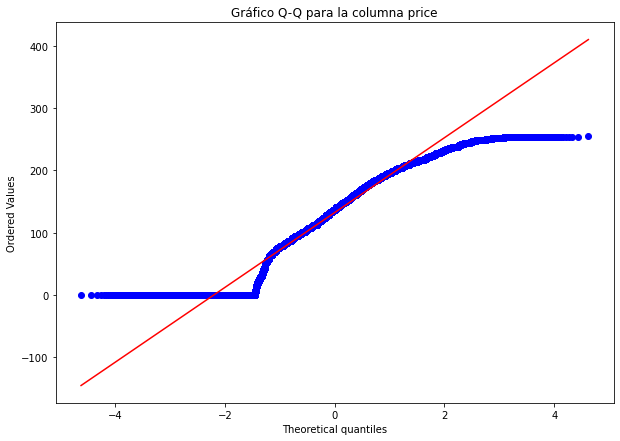

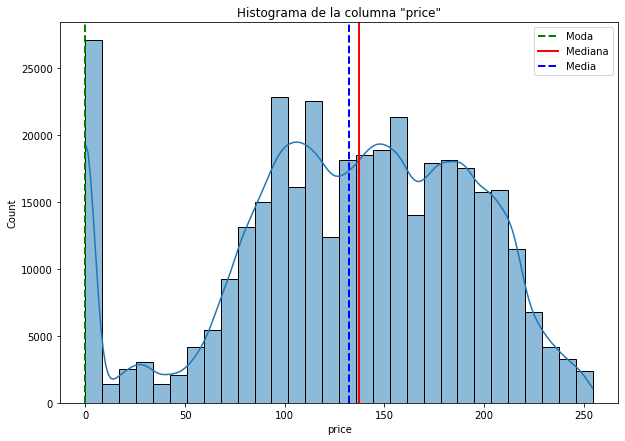



*************************************************************************************




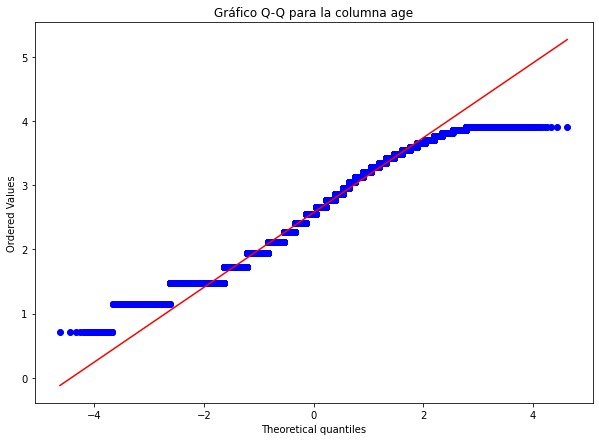

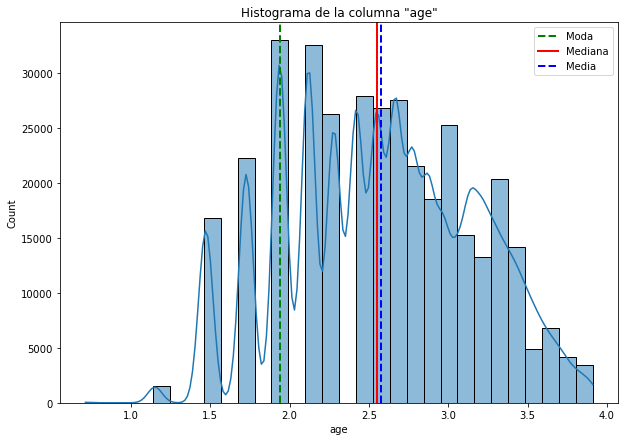



*************************************************************************************




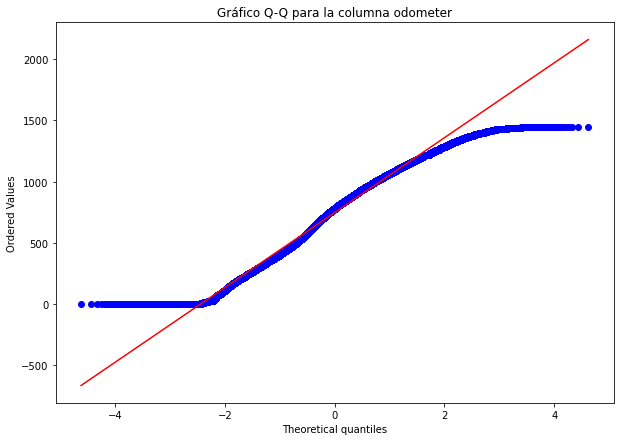

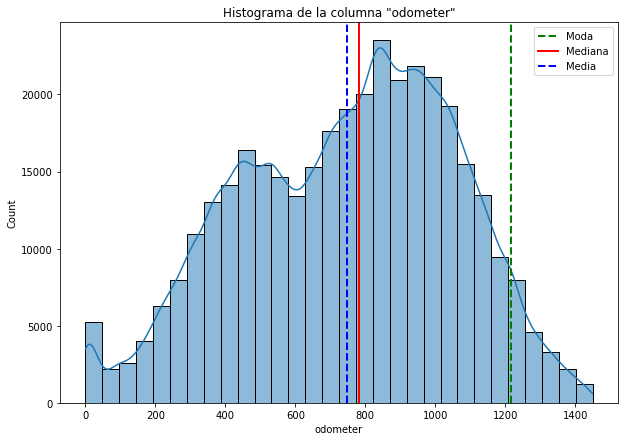

In [54]:
"""Imprimir gráficos Q-Q e Histogramas para cada columna"""

# Se declararán las funciones anteriormente creadas.

# columns_for_QQ: anteriormente definido

# Ciclo for para obtener los gráficos por columnas

for column_name in columns_for_QQ:
    print('*************************************************************************************')
    print('\n')
    create_QQ_graph_for_each_column(df=transf_df,
                                    column_name=column_name)
    obtain_histograms_per_column(df=transf_df,
                                 column_name=column_name)
    print('\n')

In [55]:
# Se observa una distribución mucho más simétrica que la de los histogramas obtenidos en el punto
# 4c). La curva obtenida mantiene un menor sesgo. Esto es debido a que la transformación de Yeo-
# Johnson es una transformación de potencia que tiene el efecto de normalizar los datos,
# haciéndolos más simétricos y cercanos a una distribución normal. La transformación puede 
# reducir eficazmente la asimetría, acercándolo a una distribución simétrica (en forma de campana).

# Este método es robusto frente a valores atípicos, lo que significa que puede reducir la influencia
# de valores extremos en la distribución.

# Para respaldar la conclusión anteriormente mencionada, se obtendrá la asimetría de cada variable
# después de su transformación.

skewness_price_trans = transf_df['price'].skew()
skewness_age_trans = transf_df['age'].skew()
skewness_odometer_trans = transf_df['odometer'].skew()

print('*************************************************************')
print(f'La asimetría de la variable "price" es: {skewness_price_trans}')
print('*************************************************************')
print(f'La asimetría de la variable "age" es: {skewness_age_trans}')
print('*************************************************************')
print(f'La asimetría de la variable "odometer" es: {skewness_odometer_trans}')
print('*************************************************************')

*************************************************************
La asimetría de la variable "price" es: -0.48722235159525784
*************************************************************
La asimetría de la variable "age" es: -0.010158161897861454
*************************************************************
La asimetría de la variable "odometer" es: -0.24472968440464285
*************************************************************


## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas. 

7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente.

7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`.


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`.

10. Concatena los dataframes obtenidos de las codificaciones anteriores al dataframe `minmax_df` (cuyas variables numéricas ya están transformadas) y elimina las columnas categóricas originales. Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.